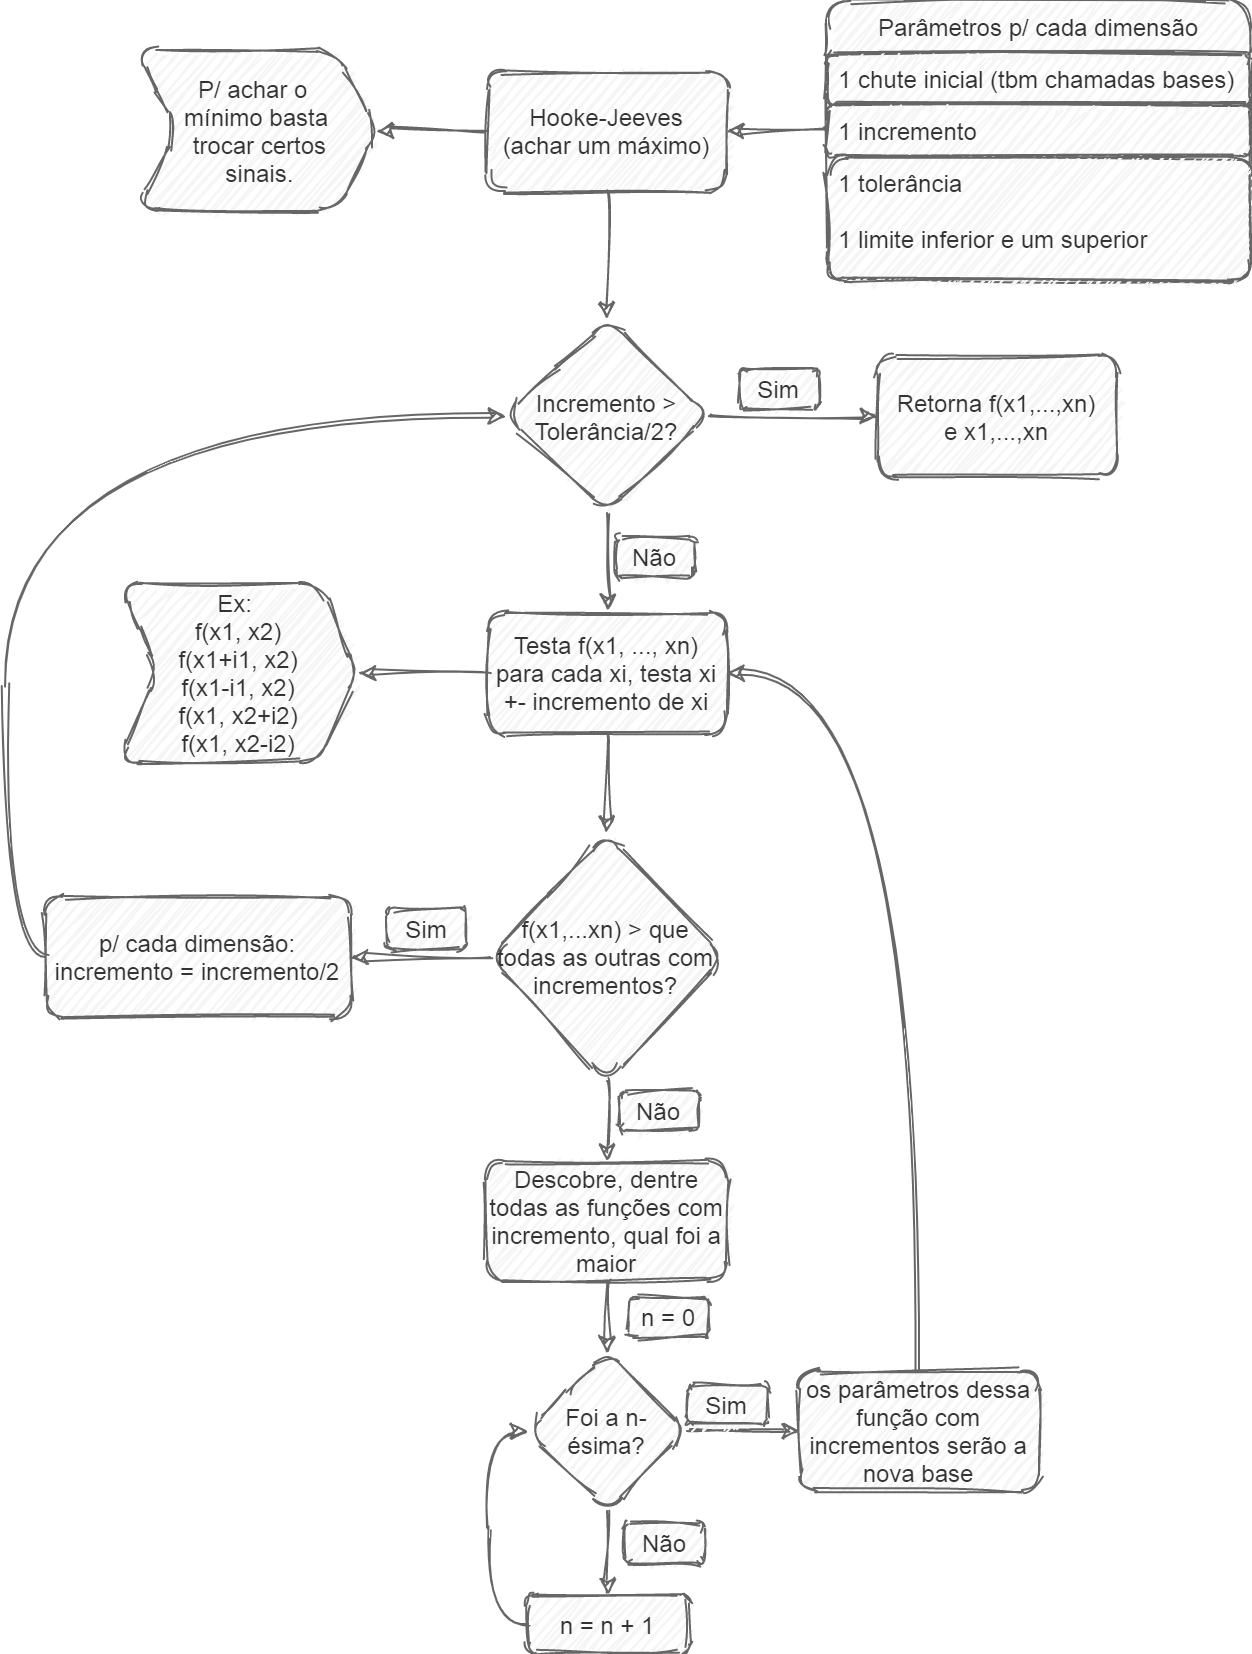

In [2]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sympy import *
import numpy as np

In [3]:
a = 2

g = lambda x, a: (x**2 + a**2)**0.5

def f(x, a = a):

    return (-8*a*x + (a+x) * g(x, a)) / g(x, a)

In [4]:
def hooke_jeeves_1d(chute, incremento, tolerancia):
        
    while incremento > tolerancia / 2:
        
        if f(chute) <= f(chute + incremento) and  f(chute) <= f(chute - incremento):
            incremento /= 2
        else:
            if f(chute + incremento) <= f(chute - incremento):
                chute += incremento
            else:
                chute -= incremento
    
    return f(chute), chute       

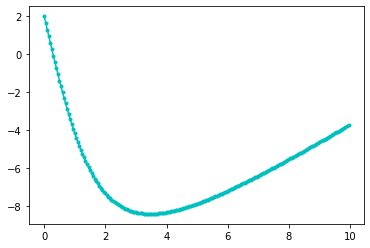

In [5]:
eixo_x = np.arange(0, 10, 0.05)
eixo_y = list(map(f, eixo_x))
grafico = plt.plot(eixo_x, eixo_y, 'c.-')

In [21]:
def hooke_jeeves_1d_fronteira(f, chute, incremento, tolerancia, lim_inf, lim_sup):
    
    assert chute >= lim_inf and chute <= lim_sup
        
    while (incremento > tolerancia / 2):
        
        if f(chute) <= f(chute + incremento) and  f(chute) <= f(chute - incremento):
            incremento /= 2
            
        else:
            if (f(chute + incremento) <= f(chute - incremento) and
                chute + incremento <= lim_sup):
                chute += incremento
                
            elif (f(chute - incremento) < f(chute + incremento) and
                  chute - incremento >= lim_inf):
                chute -= incremento
            
            else: #Interromper o loop onde na condição em que o limite inferior ou superior é o mínimo da função.
                break
    
    return f(chute), chute 

In [7]:
def acha_maior(f1, f2, f3, f4, f5):
    if f1 >= f2 and f1 >= f3 and f1 >= f4 and f1 >= f5:
        return f1
    elif f2 >= f3 and f2 >= f4 and f2 >= f5:
        return f2
    elif f3 >= f4 and f3 >= f5:
        return f3
    elif f4 >= f5:
        return f4
    else:
        return f5

In [20]:
def hooke_jeeves_2d(z, chute_x, incremento_x, tolerancia_x, lim_inf_x, lim_sup_x,
                    chute_y, incremento_y, tolerancia_y, lim_inf_y, lim_sup_y):
        
    while (incremento_x > tolerancia_x/2 and incremento_y > tolerancia_y/2):
        
        f1 = z(chute_x, chute_y)
        f2 = z(chute_x + incremento_x, chute_y)
        f3 = z(chute_x - incremento_x, chute_y)
        f4 = z(chute_x, chute_y + incremento_y)
        f5 = z(chute_x, chute_y - incremento_y)
        
        maior = acha_maior (f1, f2, f3, f4, f5)
        
        if maior == f1:            
            incremento_x /= 2
            incremento_y /= 2
            
        else:
            if maior == f2 and chute_x + incremento_x <= lim_sup_x:
                chute_x += incremento_x
            elif maior == f3 and chute_x - incremento_x >= lim_inf_x:
                chute_x -= incremento_x
            elif maior == f4 and chute_y + incremento_y <= lim_sup_y:
                chute_y += incremento_y
            elif maior == f5 and chute_y - incremento_y >= lim_inf_y:
                chute_y -= incremento_y
            else: #Interromper o loop onde na condição em que o limite inferior ou superior é o mínimo da função.
                break
    
    return f1, chute_x, chute_y  

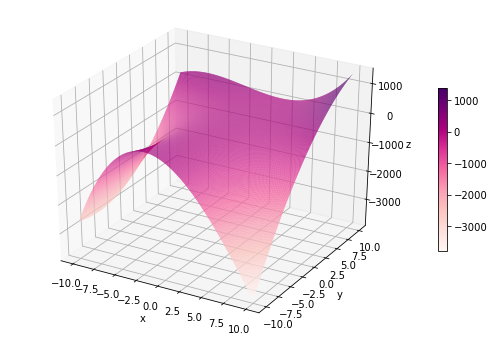

In [35]:
z = lambda x, y: x**3 + 2*x**2*y - x*y**2 + 6*x*y - 13*x**2 + y**2 - x + 2*y - 5 + np.cos(np.pi*np.e*x*y)
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
x, y = np.meshgrid(x, y)
z1 = z(x, y)

fig = plt.figure(figsize=(20,6))    
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
p1 = ax1.plot_surface(x, y, z1, cmap=mpl.cm.RdPu, rstride=4, cstride=4, linewidth=0)    
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
cb1 = fig.colorbar(p1, shrink=0.5)